<a href="https://colab.research.google.com/github/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation/blob/main/virus(_random_forest).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rembg

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 66.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 35.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 91.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.7/47.7 kB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 8.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 13.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 22.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

In [2]:
import numpy as np # dataAnalysis
import pandas as pd #multidimensional arrays
import matplotlib.pyplot as plt #data visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from skimage import img_as_ubyte
from skimage.util import img_as_float
from rembg import remove

In [3]:
!git clone https://github.com/IsharaSilva/Prediction-Recommedation-system-for-Potato-Cultivation.git

Cloning into 'Prediction-Recommedation-system-for-Potato-Cultivation'...
remote: Enumerating objects: 161, done.
remote: Counting objects: 100% (48/48), done.
remote: Compressing objects: 100% (48/48), done.
remote: Total 161 (delta 30), reused 0 (delta 0), pack-reused 113
Receiving objects: 100% (161/161), 43.31 MiB | 30.54 MiB/s, done.
Resolving deltas: 100% (100/100), done.


In [4]:
from google.colab import drive

In [5]:
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
import os
import cv2
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
# Set the path to your data directory
data_path = '/content/drive/MyDrive/Data/M_Data'

In [8]:
# List the classes and assign numerical labels
classes = {'PSTV foliar symptoms': 0, 'Rugose mosaic symptom': 1}

In [9]:
# Read the data file names and corresponding labels
data = []
labels = []
for class_name, label in classes.items():
    class_path = os.path.join(data_path, class_name)
    file_names = os.listdir(class_path)
    for file_name in file_names:
        file_path = os.path.join(class_path, file_name)
        data.append(file_path)
        labels.append(label)

In [10]:
# Split the data into training, validation, and testing sets
train_data, test_data, train_labels, test_labels = train_test_split(data, labels, test_size=0.15, random_state=42)
train_data, val_data, train_labels, val_labels = train_test_split(train_data, train_labels, test_size=0.15, random_state=42)


In [11]:
# Print the size of each set
print('Training set size:', len(train_data))
print('Validation set size:', len(val_data))
print('Testing set size:', len(test_data))

Training set size: 505
Validation set size: 90
Testing set size: 105


In [12]:
# Load and preprocess the images
def preprocess_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image = cv2.resize(image, (128, 128))
    image = image.flatten()
    return image


In [13]:
train_images = [preprocess_image(image_path) for image_path in train_data]
val_images = [preprocess_image(image_path) for image_path in val_data]
test_images = [preprocess_image(image_path) for image_path in test_data]

In [14]:
# Convert the images and labels to numpy arrays
train_images = np.array(train_images)
val_images = np.array(val_images)
test_images = np.array(test_images)
train_labels = np.array(train_labels)
val_labels = np.array(val_labels)
test_labels = np.array(test_labels)

In [15]:
# Train the Random Forest Classifier
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(train_images, train_labels)

RandomForestClassifier(random_state=42)

In [16]:
# Evaluate the model on validation set
val_predictions = RF_model.predict(val_images)
val_accuracy = accuracy_score(val_labels, val_predictions)
print("Validation Accuracy:", val_accuracy)

Validation Accuracy: 0.9444444444444444


In [17]:
# Evaluate the model on test set
test_predictions = RF_model.predict(test_images)
test_accuracy = accuracy_score(test_labels, test_predictions)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9809523809523809


In [19]:
# Convert labels back to original class names
le = LabelEncoder()
le.fit(labels)

LabelEncoder()

LabelEncoder()

In [20]:
# Print the confusion matrix
confusion = confusion_matrix(test_labels, test_predictions)

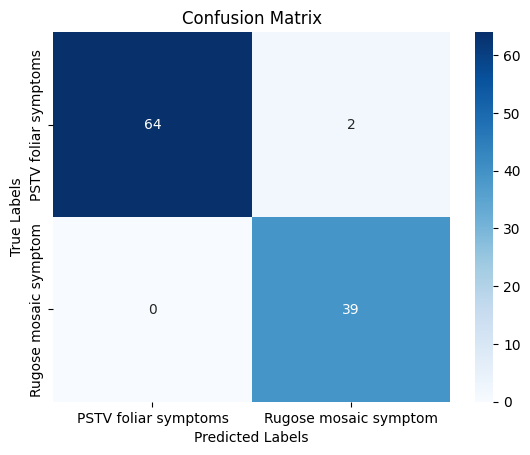

In [21]:
# Modify the confusion matrix display
class_names = list(classes.keys())
fig, ax = plt.subplots()
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')
plt.show()

In [22]:
# Save the predicted labels and their corresponding images in a dataframe
df = pd.DataFrame({"Image": test_data, "Actual Label": test_labels, "Predicted Label": test_predictions})
df.to_csv('/content/drive/MyDrive/Data/predictions.csv', index=False)